## Deep Image Classifier

#### Importing Dependencies

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import PIL
import numpy
import gradio as gr
import PIL.Image


### Downloading dataset from specific url

In [6]:
# Extract data from url 

import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
archive = tf.keras.utils.get_file(origin=dataset_url, extract=True)
data_dir = pathlib.Path(archive).with_suffix('')

In [7]:
#Number of images in dataset

image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


#### Check random images

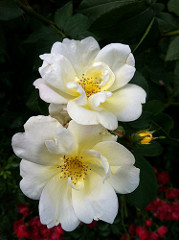

In [12]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

### Training and Validation directory of model

In [15]:
#Size of the image in pixels

img_h=180
img_w=180

In [17]:

#Training directory

train_data=tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_h, img_w),
    batch_size=32

)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [19]:

#Validation directory

val_dir=tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_h, img_w),
    batch_size=32
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [21]:
#Inspecting classes and names in dataset

class_names = train_data.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


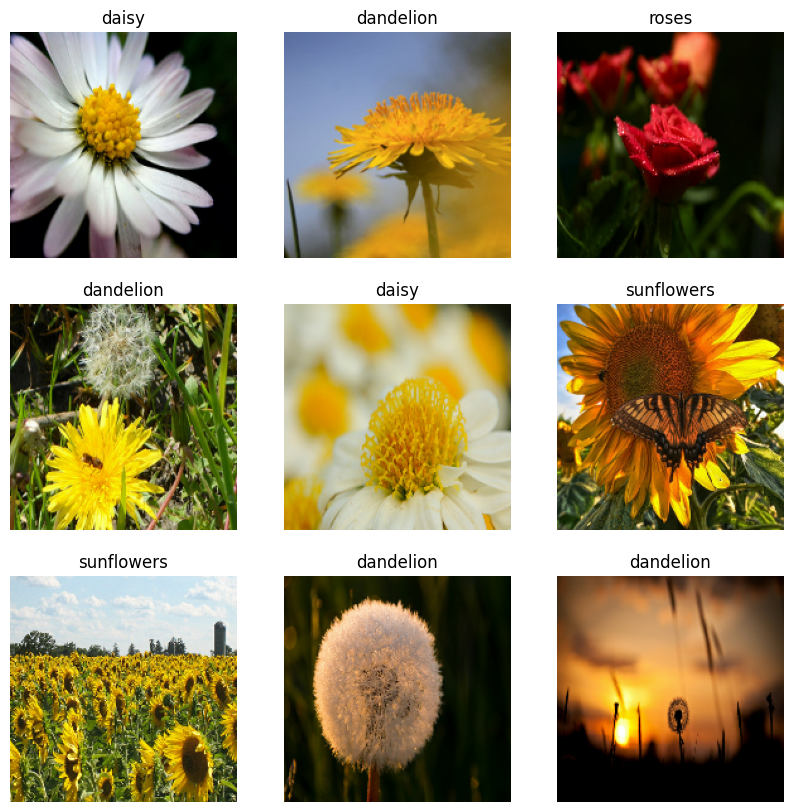

In [26]:
#plot images

plt.figure(figsize=(10,10))

for images, labels in train_data.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Model Architecture

In [28]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [30]:
#Model Architecture


num_classes=5

model = Sequential([

    layers.Conv2D(16, (3,3), activation='relu', input_shape=(img_h, img_w, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')


])


In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 89, 89, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 41, 41, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 20, 20, 64)      

### Train the model 

In [34]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [35]:
history=model.fit(train_data, validation_data=val_dir, epochs=50)

Epoch 1/50


d:\Miniconda\envs\DeepLearning\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


92/92 [==============================] - 10s 57ms/step - loss: 9.0938 - accuracy: 0.3948 - val_loss: 1.1656 - val_accuracy: 0.5150
Epoch 2/50
92/92 [==============================] - 5s 48ms/step - loss: 1.1087 - accuracy: 0.5504 - val_loss: 1.0477 - val_accuracy: 0.6158
Epoch 3/50
92/92 [==============================] - 5s 48ms/step - loss: 1.0239 - accuracy: 0.5926 - val_loss: 1.0436 - val_accuracy: 0.5790
Epoch 4/50
92/92 [==============================] - 5s 49ms/step - loss: 0.9397 - accuracy: 0.6298 - val_loss: 1.0142 - val_accuracy: 0.5954
Epoch 5/50
92/92 [==============================] - 5s 48ms/step - loss: 0.8359 - accuracy: 0.6720 - val_loss: 0.9545 - val_accuracy: 0.6335
Epoch 6/50
92/92 [==============================] - 5s 48ms/step - loss: 0.7246 - accuracy: 0.7163 - val_loss: 0.9374 - val_accuracy: 0.6349
Epoch 7/50
92/92 [==============================] - 6s 63ms/step - loss: 0.6464 - accuracy: 0.7534 - val_loss: 0.9065 - val_accuracy: 0.6458
Epoch 8/50
92/92 [=====

### Gradio Interface to predict the result

In [37]:

#Predict the result
def predict_image(img):
    img_4d=img.reshape(-1, 180, 180, 3)
    prediction=model.predict(img_4d)[0]

    return {class_names[i]: float(prediction[i]) for i in range(5)}


In [38]:
#Save the model
model.save('flowersclassifier.h5')

In [41]:
#Gradio Interface

interface=gr.Interface(fn=predict_image, inputs="image", outputs="label")


In [42]:
interface.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


1/1 [==============================] - 0s 451ms/step


### Successfully identified the five classes of flowers